# JBI100 Visualization 
### Academic year 2024-2025

## Incidents and Accidents
Data sources:

- Australian Shark Incidents (https://github.com/cjabradshaw/AustralianSharkIncidentDatabase)

Data dictionaries and additional info can be found in the respective data folders.
Note: you only need to select one dataset for your project.

This visualization tool aims to inform the general public, particularly beachgoers, about shark incidents in Australia. It seeks to replace fear and misinformation with data-driven understanding, empowering individuals to make informed decisions about ocean safety. The visualization will allow users to explore the historical and geographical distribution of shark incidents, understand the factors associated with these incidents (e.g., time of year, activity, species involved), and learn about the relative risk at different locations and times.

In [2]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Do not truncate tables
pd.set_option('display.max_columns', None)

# If you receive a 'ModuleNotFoundError' please install the according library. 
# This can be done from within the Jupyter environment with the command 
#'!python3 -m pip install lib' where lib is the according library name.

In [3]:
# Load the data

# Australian Shark Incidents Data
df_shark = pd.read_excel('Australian Shark-Incident Database Public Version.xlsx', index_col=0)

## Explore Shark Data

In [4]:
#df_shark.sample(50)
df_shark.head(5)

,Incident.month,Incident.year,Victim.injury,State,Location,Latitude,Longitude,Site.category,Site.category.comment,Shark.common.name,Shark.scientific.name,Shark.identification.method,Shark.identification.source,Shark.length.m,Basis.for.length,Provoked/unprovoked,Provocative.act,No.sharks,Victim.activity,Fish.speared?,Commercial.dive.activity,Object.of.bite,Present.at.time.of.bite,Direction.first.strike,Shark.behaviour,Victim.aware.of.shark,Shark.captured,Injury.location,Injury.severity,Victim.gender,Victim.age,Victim.clothing,Clothing.coverage,Dominant.clothing.colour,Other.clothing.colour,Clothing.pattern,Fin.colour,Diversionary.action.taken,Diversionary.action.outcome,People <3m,People 3-15m,Time.of.incident,Depth.of.incident.m,Teeth.recovered,Time.in.water.min,Water.temperature.°C,Total.water.depth.m,Water.visability.m,Distance.to.shore.m,Spring.or.neap.tide,Tidal.cycle,Wind.condition,Weather.condition,Air.temperature.°C,Personal.protective.device,Deterrent.brand.and.type,Data.source,Reference,Unnamed: 59
UIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1791,fatal,NSW,near sydney,-33.866667,151.2,coastal,NaN,white shark,Carcharodon carcharias,"bite analysis, shark behaviour, geographical l...",NaN,NaN,NaN,unprovoked,NaN,NaN,swimming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,torso,major lacerations,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,book,"shark&survl, whitley 1958, book ref 1793",NaN
2,3,1803,injured,WA,"hamelin bay, faure island",-25.833333,113.883333,coastal,NaN,tiger shark,Galeocerdo cuvier,"bite analysis, shark behaviour, geographical l...",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,NaN,NaN,swam at victim,Y,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pushed at shark,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,book,"balgridge,green,taylor,whitley 1940",NaN
3,1,1807,injured,NSW,"cockle bay, sydney harbour",-33.866667,151.2,estuary/harbour,NaN,bull shark,Carcharhinus leucas,"bite analysis, shark behaviour",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,NaN,NaN,bit victim on wrist,NaN,NaN,"arm, hand",minor lacerations,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media outlet,sydney gazette 18.1.1807,NaN
4,1,1820,fatal,TAS,"sweetwater point, pitt water",-42.8,147.533333,coastal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,provoked,NaN,1.0,swimming,NaN,NaN,NaN,catch,NaN,bit victim on leg,N,NaN,leg,major lacerations,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,witness account,"shark&survl, c. black researcher",NaN
5,1,1825,injured,NSW,"kirribili point, sydney harbour",-33.85,151.216667,estuary/harbour,NaN,bull shark,Carcharhinus leucas,"bite analysis, shark behaviour, geographical l...",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,NaN,NaN,bit legs,NaN,NaN,leg,minor lacerations,male,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media outlet,maitland daily mercury 13.11.1899,NaN


In [5]:
df_shark.describe()

,Incident.month,Incident.year,Shark.length.m,No.sharks,Victim.age,People <3m,People 3-15m,Time.of.incident,Depth.of.incident.m,Time.in.water.min,Water.temperature.°C,Total.water.depth.m,Water.visability.m,Distance.to.shore.m,Spring.or.neap.tide,Air.temperature.°C,Unnamed: 59
count,1233.000000,1233.000000,590.000000,1140.000000,723.000000,97.000000,83.000000,522.000000,520.000000,230.000000,91.000000,228.000000,70.000000,360.000000,0.0,40.000000,1.0
mean,5.939984,1968.518248,2.696855,1.034211,28.269710,1.556701,3.289157,1281.689655,2.130000,59.370000,20.981319,5.961404,10.371429,3176.019444,NaN,24.175000,415438758.0
std,4.084692,48.451842,1.206209,0.342569,13.963268,1.561043,5.511695,409.954877,5.474775,253.578818,4.127090,9.286013,22.023815,21519.531041,NaN,4.914069,NaN
min,1.000000,1791.000000,0.300000,1.000000,0.000000,0.000000,0.000000,130.000000,0.000000,0.100000,0.300000,0.500000,0.000000,1.000000,NaN,10.000000,415438758.0
25%,2.000000,1933.000000,1.800000,1.000000,17.000000,1.000000,1.000000,933.750000,0.000000,3.000000,19.000000,1.000000,1.000000,30.000000,NaN,22.000000,415438758.0
50%,5.000000,1986.000000,2.600000,1.000000,25.000000,1.000000,2.000000,1300.000000,0.000000,10.000000,21.000000,2.000000,5.000000,80.000000,NaN,25.000000,415438758.0
75%,10.000000,2011.000000,3.500000,1.000000,37.000000,2.000000,3.000000,1620.000000,1.000000,30.000000,23.000000,7.000000,10.000000,200.000000,NaN,27.000000,415438758.0
max,12.000000,2024.000000,6.000000,10.000000,84.000000,12.000000,40.000000,2330.000000,45.000000,2160.000000,29.000000,80.000000,150.000000,280000.000000,NaN,35.000000,415438758.0


In [14]:
fig = px.scatter(df_shark, x="Incident.year", y="Victim.age",
                 width=1000, height=800)
fig.show()

Text(0.5, 0, 'Incident Year')

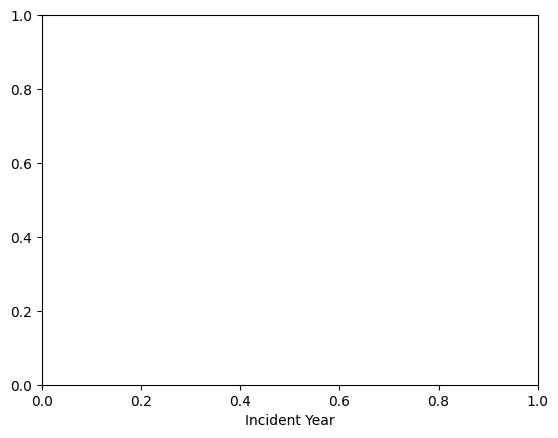

In [12]:
# plot histogram of shark incidents by year
fig = px.histogram(df_shark, x="Incident.year",
                 width=1000, height=800)
fig.show()
plt.xlabel('Incident Year')

In [ ]:
#(c) Data Parsing Function:
def get_data_at_position(row, col):
    """Retrieves data at a specified row and column."""
    try:
        return df_shark.iloc[row, col]  # Use iloc for integer-based indexing
    except IndexError:
        return None  # Return None if the index is out of bounds

# Example usage:
value = get_data_at_position(0, 2)  # Get the value at the 1st row and 3rd column
print(f"Value at (0, 2): {value}")

Value at (0, 2): fatal


In [ ]:
#(d) Attribute Distribution and Frequency Counts:
def analyze_attribute_distribution(attribute_name):
    """Calculates and prints the distribution and frequency counts of an attribute."""
    if attribute_name not in df_shark.columns:
        print(f"Error: Attribute '{attribute_name}' not found in the dataset.")
        return
    
    print(f"\nDistribution and Frequency Counts for '{attribute_name}':")
    print(df_shark[attribute_name].value_counts(dropna=False)) # Include NaN values
    
    # Visualization (optional - uncomment if needed):
    # df[attribute_name].value_counts().plot(kind='bar') 
    # plt.title(f"Distribution of {attribute_name}")
    # plt.show()

# Example usage:
analyze_attribute_distribution('Incident.month')
analyze_attribute_distribution('Victim.injury')



Distribution and Frequency Counts for 'Incident.month':
Incident.month
1     228
12    160
2     147
3     122
11    118
10     93
4      92
9      61
6      58
7      56
5      51
8      47
Name: count, dtype: int64

Distribution and Frequency Counts for 'Victim.injury':
Victim.injury
injured      746
fatal        255
uninjured    229
unknown        1
Injured        1
injury         1
Name: count, dtype: int64


In [ ]:
#(f) Missing Values Analysis:
def analyze_missing_values():
    """Analyzes and prints the number of missing values per attribute and per entry."""
    print("\nMissing Values Analysis:")
    print(df_shark.isnull().sum())  # Missing values per attribute
    print("\nMissing Values per Entry:")
    print(df_shark.isnull().sum(axis=1))  # Missing values per row (entry)

    # Identify most relevant missing values:
    missing_ratios = df_shark.isnull().sum() / len(df_shark) * 100
    print("\nMissing Value Ratios (%):")
    print(missing_ratios) # Percentage of missing values per attribute


    potentially_problematic = missing_ratios[missing_ratios > 10] # Threshold - adjust as needed
    print("\nPotentially Problematic Missing Values (Attributes with > 10% missing):")
    print(potentially_problematic)


analyze_missing_values()


Missing Values Analysis:
Incident.month                    0
Incident.year                     0
Victim.injury                     0
State                             0
Location                          3
Latitude                          0
Longitude                         0
Site.category                     0
Site.category.comment          1185
Shark.common.name                57
Shark.scientific.name            66
Shark.identification.method     229
Shark.identification.source    1085
Shark.length.m                  643
Basis.for.length                751
Provoked/unprovoked               7
Provocative.act                1081
No.sharks                        93
Victim.activity                  33
Fish.speared?                  1229
Commercial.dive.activity       1096
Object.of.bite                  936
Present.at.time.of.bite         637
Direction.first.strike          929
Shark.behaviour                 250
Victim.aware.of.shark           618
Shark.captured                 1155
In

Deal with missing values 

In [ ]:
def compute_missing_values():
    # For the attributes we intend to use in the visualization we will compute the missing values 
    # For Victim activity wherever there is a missing value we will put "Unknown"
    df_shark['Victim.activity'].fillna('Unknown', inplace=True)
    df_shark['Shark.common.name'].fillna('Unknown', inplace=True)
    

compute_missing_values()
df_shark.head(5)

C:\Users\20224785\AppData\Local\Temp\ipykernel_16808\2013943686.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\20224785\AppData\Local\Temp\ipykernel_16808\2013943686.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,Incident.month,Incident.year,Victim.injury,State,Location,Latitude,Longitude,Site.category,Site.category.comment,Shark.common.name,Shark.scientific.name,Shark.identification.method,Shark.identification.source,Shark.length.m,Basis.for.length,Provoked/unprovoked,Provocative.act,No.sharks,Victim.activity,Fish.speared?,Commercial.dive.activity,Object.of.bite,Present.at.time.of.bite,Direction.first.strike,Shark.behaviour,Victim.aware.of.shark,Shark.captured,Injury.location,Injury.severity,Victim.gender,Victim.age,Victim.clothing,Clothing.coverage,Dominant.clothing.colour,Other.clothing.colour,Clothing.pattern,Fin.colour,Diversionary.action.taken,Diversionary.action.outcome,People <3m,People 3-15m,Time.of.incident,Depth.of.incident.m,Teeth.recovered,Time.in.water.min,Water.temperature.°C,Total.water.depth.m,Water.visability.m,Distance.to.shore.m,Spring.or.neap.tide,Tidal.cycle,Wind.condition,Weather.condition,Air.temperature.°C,Personal.protective.device,Deterrent.brand.and.type,Data.source,Reference,Unnamed: 59
UIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1791,fatal,NSW,near sydney,-33.866667,151.2,coastal,NaN,white shark,Carcharodon carcharias,"bite analysis, shark behaviour, geographical l...",NaN,NaN,NaN,unprovoked,NaN,NaN,swimming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,torso,major lacerations,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,book,"shark&survl, whitley 1958, book ref 1793",NaN
2,3,1803,injured,WA,"hamelin bay, faure island",-25.833333,113.883333,coastal,NaN,tiger shark,Galeocerdo cuvier,"bite analysis, shark behaviour, geographical l...",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,NaN,NaN,swam at victim,Y,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pushed at shark,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,book,"balgridge,green,taylor,whitley 1940",NaN
3,1,1807,injured,NSW,"cockle bay, sydney harbour",-33.866667,151.2,estuary/harbour,NaN,bull shark,Carcharhinus leucas,"bite analysis, shark behaviour",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,NaN,NaN,bit victim on wrist,NaN,NaN,"arm, hand",minor lacerations,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media outlet,sydney gazette 18.1.1807,NaN
4,1,1820,fatal,TAS,"sweetwater point, pitt water",-42.8,147.533333,coastal,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,provoked,NaN,1.0,swimming,NaN,NaN,NaN,catch,NaN,bit victim on leg,N,NaN,leg,major lacerations,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,witness account,"shark&survl, c. black researcher",NaN
5,1,1825,injured,NSW,"kirribili point, sydney harbour",-33.85,151.216667,estuary/harbour,NaN,bull shark,Carcharhinus leucas,"bite analysis, shark behaviour, geographical l...",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,NaN,NaN,bit legs,NaN,NaN,leg,minor lacerations,male,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media outlet,maitland daily mercury 13.11.1899,NaN


Exploring location details 

In [ ]:
def check_common_areas():
    location_categories = df_shark['Location'].unique()
    print(f"There are {len(location_categories)} unique location categories.")
    print(location_categories)